<a href="https://colab.research.google.com/github/summerolmstead/MachineLearningFinal/blob/main/ML_Final_Olmstead_Summer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For my Final Project, I would like to predict the Nvidia Stock price in the next months. I found the Data from yahoo!Finance and downloaded the csv of Nvidia from the past five years.

https://finance.yahoo.com/quote/NVDA/history

In [69]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the DF

In [70]:
import pandas as pd

# Specify the file path in your Google Drive
file_path = '/content/drive/MyDrive/ML.Final/NVDA.5y.csv'  #this is the past five years data of nvidia's stock

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')  #making sure in correct date

# Display the DataFrame
print(df.head())   #this is the original df


        Date       Open       High        Low      Close  Adj Close    Volume
0 2019-04-17  47.404999  47.615002  46.597500  46.822498  46.504501  35100400
1 2019-04-18  46.889999  47.232498  46.294998  46.575001  46.258686  38098800
2 2019-04-22  46.337502  47.275002  46.020000  47.117500  46.797493  27993600
3 2019-04-23  47.250000  47.982498  47.152500  47.667500  47.343758  34685600
4 2019-04-24  47.772499  48.202499  47.160000  47.792500  47.467922  31820400


In [71]:
# Calculate the moving averages with a window size of 10
df['Moving_Average_10'] = df['Close'].rolling(window=10).mean()

# Display the DataFrame with the new column
print(df.head(15))  # Adjust the number of rows displayed as needed


         Date       Open       High        Low      Close  Adj Close  \
0  2019-04-17  47.404999  47.615002  46.597500  46.822498  46.504501   
1  2019-04-18  46.889999  47.232498  46.294998  46.575001  46.258686   
2  2019-04-22  46.337502  47.275002  46.020000  47.117500  46.797493   
3  2019-04-23  47.250000  47.982498  47.152500  47.667500  47.343758   
4  2019-04-24  47.772499  48.202499  47.160000  47.792500  47.467922   
5  2019-04-25  47.387501  47.612499  45.924999  46.727501  46.410149   
6  2019-04-26  45.177502  45.222500  43.325001  44.522499  44.220127   
7  2019-04-29  44.602501  45.112499  43.875000  44.832500  44.528023   
8  2019-04-30  44.507500  45.507500  44.314999  45.250000  44.942680   
9  2019-05-01  45.777500  46.202499  45.115002  45.117500  44.811092   
10 2019-05-02  45.215000  46.217499  44.779999  45.797501  45.486473   
11 2019-05-03  45.882500  45.982498  45.132500  45.752499  45.441780   
12 2019-05-06  43.875000  45.084999  43.500000  44.962502  44.65

Data Prep + Cleaning

In [72]:
# Check for NaN values in the DataFrame
nan_counts = df.isna().sum()

# Display the counts of NaN values in each column
print(nan_counts)

#returned - there is 0 NaN values which is not suprising given the stock market is reported every day from open to close (no data on weekends keep in mind)

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Moving_Average_10    9
dtype: int64


In [73]:
# Fill NaN values in the 'Moving_Average_10' column using backward fill (bfill)
df['Moving_Average_10'].fillna(method='bfill', inplace=True, limit=10)
print(df.head()) #just to confirm we did successfully add this indicator

        Date       Open       High        Low      Close  Adj Close    Volume  \
0 2019-04-17  47.404999  47.615002  46.597500  46.822498  46.504501  35100400   
1 2019-04-18  46.889999  47.232498  46.294998  46.575001  46.258686  38098800   
2 2019-04-22  46.337502  47.275002  46.020000  47.117500  46.797493  27993600   
3 2019-04-23  47.250000  47.982498  47.152500  47.667500  47.343758  34685600   
4 2019-04-24  47.772499  48.202499  47.160000  47.792500  47.467922  31820400   

   Moving_Average_10  
0            46.2425  
1            46.2425  
2            46.2425  
3            46.2425  
4            46.2425  


In [74]:
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0    2019-04-17   47.404999   47.615002   46.597500   46.822498   46.504501   
1    2019-04-18   46.889999   47.232498   46.294998   46.575001   46.258686   
2    2019-04-22   46.337502   47.275002   46.020000   47.117500   46.797493   
3    2019-04-23   47.250000   47.982498   47.152500   47.667500   47.343758   
4    2019-04-24   47.772499   48.202499   47.160000   47.792500   47.467922   
...         ...         ...         ...         ...         ...         ...   
1254 2024-04-11  874.200012  907.390015  869.260010  906.159973  906.159973   
1255 2024-04-12  896.989990  901.750000  875.299988  881.859985  881.859985   
1256 2024-04-15  890.979980  906.130005  859.289978  860.010010  860.010010   
1257 2024-04-16  864.330017  881.179993  860.640015  874.150024  874.150024   
1258 2024-04-17  883.000000  887.750000  839.500000  840.349976  840.349976   

        Volume  Moving_Average_10  
0     35100400 

Lets build the LSTM Model!

Epoch 1/100, Train Loss: 0.010868816636502743, Val Loss: 0.0071698687970638275
Epoch 2/100, Train Loss: 0.007428084034472704, Val Loss: 0.004008700605481863
Epoch 3/100, Train Loss: 0.006024894770234823, Val Loss: 0.003322473494336009
Epoch 4/100, Train Loss: 0.004704364109784365, Val Loss: 0.0037435037083923817
Epoch 5/100, Train Loss: 0.00346174044534564, Val Loss: 0.002649889327585697
Epoch 6/100, Train Loss: 0.004928354173898697, Val Loss: 0.002841455629095435
Epoch 7/100, Train Loss: 0.0029515575151890516, Val Loss: 0.002495442982763052
Epoch 8/100, Train Loss: 0.0019384471233934164, Val Loss: 0.002947163302451372
Epoch 9/100, Train Loss: 0.005163903348147869, Val Loss: 0.0029176014941185713
Epoch 10/100, Train Loss: 0.003070177510380745, Val Loss: 0.002781542716547847
Epoch 11/100, Train Loss: 0.0019027336966246367, Val Loss: 0.002470182254910469
Epoch 12/100, Train Loss: 0.0027066271286457777, Val Loss: 0.0024317828938364983
Epoch 13/100, Train Loss: 0.002046535722911358, Val Lo

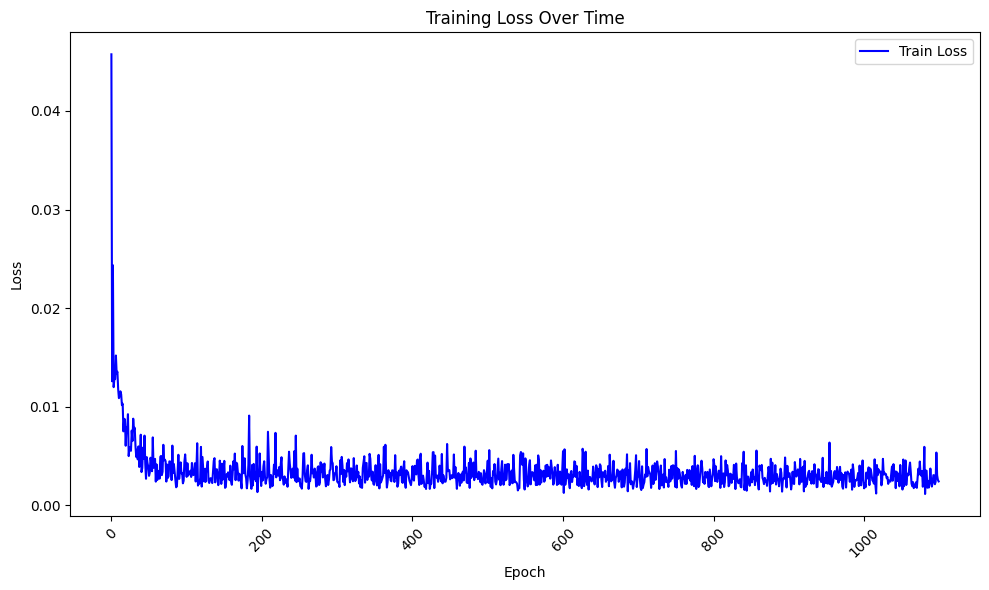

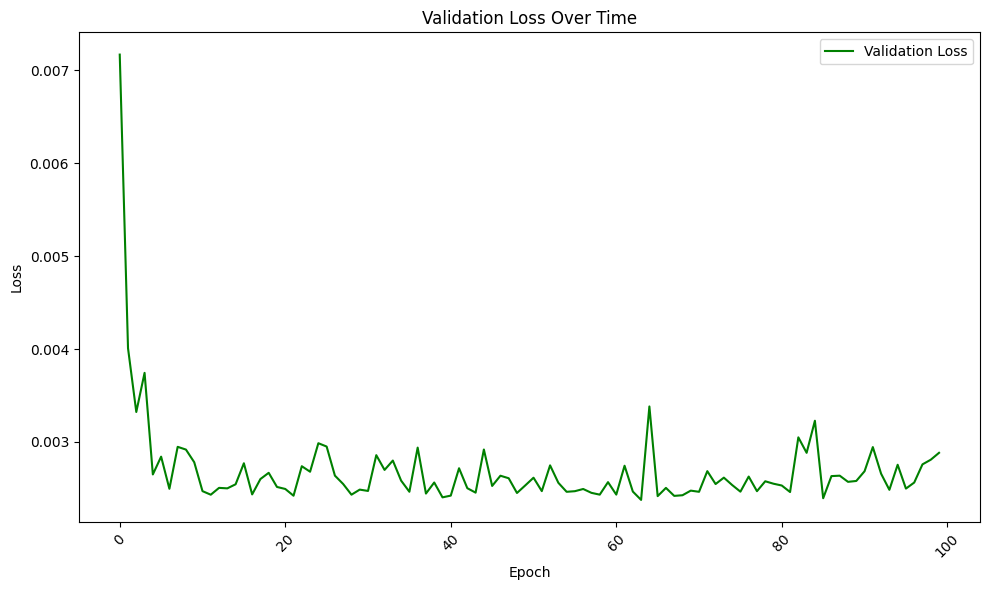

Test Loss: 0.010337192692021106


In [182]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming df contains the required data and has been preprocessed as before

# Define window size for sequences
window_size = 90

# Create sequences for training, validation, and testing
sequences = []
for i in range(len(df) - window_size):
    seq = df[['Open_scaled', 'Volume_scaled', 'Moving_Average_10_scaled']].values[i:i+window_size]
    sequences.append(seq)

# Convert sequences to PyTorch tensors
sequences = torch.tensor(sequences, dtype=torch.float32)
X = sequences[:, :-1]  # Input sequences
y = sequences[:, -1]  # Target sequences

# Split data into training, validation, and testing sets
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

num_samples = len(sequences)
train_samples = int(train_ratio * num_samples)
val_samples = int(val_ratio * num_samples)
test_samples = num_samples - train_samples - val_samples

X_train, X_val, X_test = X[:train_samples], X[train_samples:train_samples + val_samples], X[train_samples + val_samples:]
y_train, y_val, y_test = y[:train_samples], y[train_samples:train_samples + val_samples], y[train_samples + val_samples:]

# Reshape target tensors to have correct shape (batch_size, output_size)
y_train = y_train.view(-1, 3)
y_val = y_val.view(-1, 3)
y_test = y_test.view(-1, 3)

# Create DataLoader for training, validation, and testing sets with batch size
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define your enhanced LSTM model
class EnhancedLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(EnhancedLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Get the output from the last time step only
        return out

# Define hyperparameters and instantiate the model
input_size = 3  # Adjust based on your feature dimension
hidden_size = 64  # Best hyperparameter from your GridSearchCV
num_layers = 2  # Best hyperparameter from your GridSearchCV
output_size = 3  # Adjust based on your output dimension
model = EnhancedLSTM(input_size, hidden_size, num_layers, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop with DataLoader and validation
num_epochs = 100  # Best hyperparameter from your GridSearchCV
train_losses = []
val_losses = []
best_val_loss = float('inf')
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for val_inputs, val_targets in val_loader:
            val_outputs = model(val_inputs)
            val_loss += criterion(val_outputs, val_targets)
    val_loss /= len(val_loader)
    val_losses.append(val_loss.item())

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item()}, Val Loss: {val_loss.item()}')

    # Save the model with the best validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')

# Plotting training loss over time
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss', color='blue')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting validation loss over time
plt.figure(figsize=(10, 6))
plt.plot(val_losses, label='Validation Loss', color='green')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Load the best model for testing
best_model = EnhancedLSTM(input_size, hidden_size, num_layers, output_size)
best_model.load_state_dict(torch.load('best_model.pth'))

# Evaluate model on testing set
best_model.eval()
test_loss = 0.0
with torch.no_grad():
    for test_inputs, test_targets in test_loader:
        test_outputs = best_model(test_inputs)
        test_loss += criterion(test_outputs, test_targets).item() * len(test_inputs)
test_loss /= len(test_loader.dataset)
print(f'Test Loss: {test_loss}')


Example of the Model Predicting and the Actual Data from the past five years of the stocks history to showcase how close the model predicts!

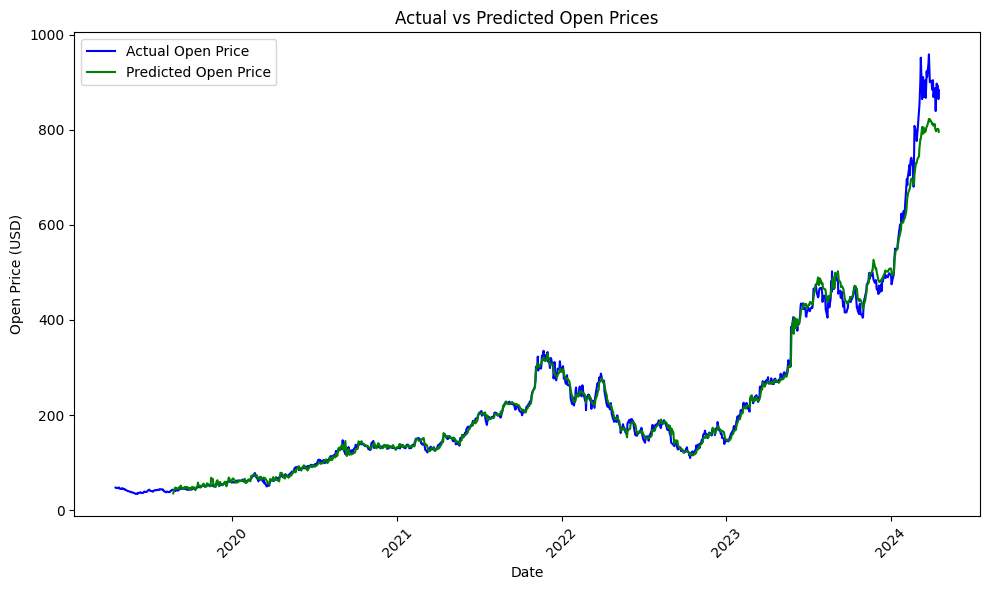

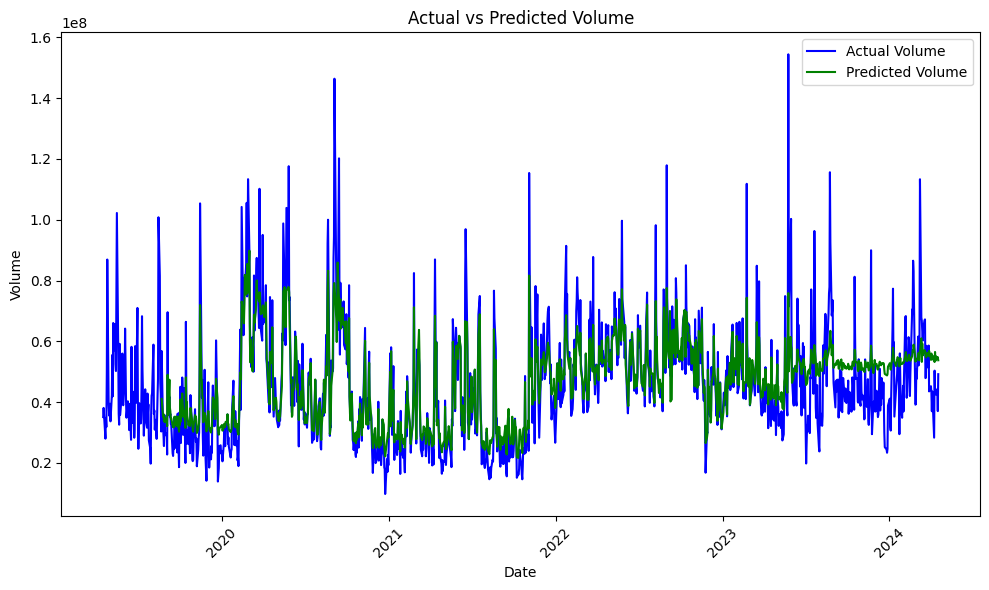

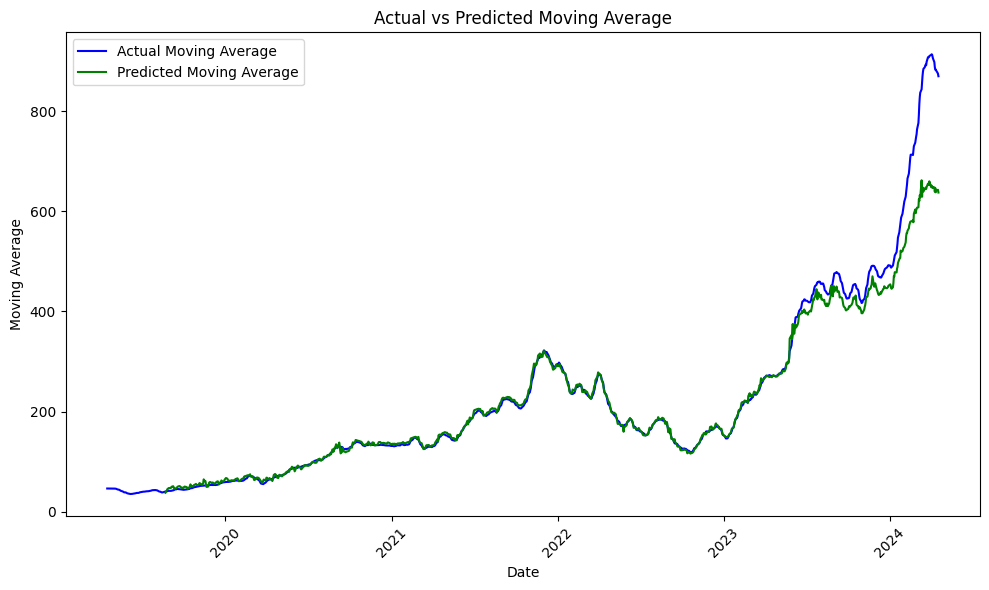

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch

# Assuming df contains the required data

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Open', 'Volume', 'Moving_Average_10']])
df[['Open_scaled', 'Volume_scaled', 'Moving_Average_10_scaled']] = scaled_data

# Assuming the window size used during training is 90 for three-month predictions
window_size = 90

# Create sequences for prediction
sequences_pred = []
for i in range(len(df) - window_size + 1):
    seq = df[['Open_scaled', 'Volume_scaled', 'Moving_Average_10_scaled']].values[i:i+window_size]
    sequences_pred.append(seq)

# Convert sequences to PyTorch tensor and reshape
X_pred = torch.tensor(sequences_pred, dtype=torch.float32)

# Assuming 'model' is your trained LSTM model
# Set the model to evaluation mode
model.eval()

# Make predictions
with torch.no_grad():
    predicted_values = model(X_pred)

# Inverse scale the predicted values to get actual stock prices in USD
predicted_prices = scaler.inverse_transform(predicted_values.view(-1, 3))

# Create a new DataFrame for easier plotting
predicted_df = pd.DataFrame(predicted_prices, columns=['Predicted Open', 'Predicted Volume', 'Predicted Moving Average'])
predicted_df['Date'] = df['Date'][-len(predicted_prices):].reset_index(drop=True)

# Plotting

# Plot predicted Open prices
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Open'], label='Actual Open Price', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted Open'], label='Predicted Open Price', color='green')

plt.xlabel('Date')
plt.ylabel('Open Price (USD)')
plt.title('Actual vs Predicted Open Prices')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot predicted Volume
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], label='Actual Volume', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted Volume'], label='Predicted Volume', color='green')

plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Actual vs Predicted Volume')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot predicted Moving Average
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Moving_Average_10'], label='Actual Moving Average', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted Moving Average'], label='Predicted Moving Average', color='green')

plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.title('Actual vs Predicted Moving Average')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


prediction of 90 days into the future!

Predicting future

predicted prices     Predicted Open  Predicted Volume  Predicted Moving Average       Date
0       672.043137      5.101482e+07                594.297541 2024-04-18
1       623.800432      5.673401e+07                564.332794 2024-04-19
2       552.850019      5.856197e+07                518.275822 2024-04-20
3       483.960973      4.991159e+07                477.822736 2024-04-21
4       467.965477      4.924623e+07                466.884018 2024-04-22
..             ...               ...                       ...        ...
85      213.460623      5.940124e+07                221.086850 2024-07-12
86      212.662669      5.947123e+07                220.265565 2024-07-13
87      211.900243      5.953575e+07                219.457457 2024-07-14
88      211.138686      5.964091e+07                218.644847 2024-07-15
89      210.348088      5.972160e+07                217.826623 2024-07-16

[90 rows x 4 columns]


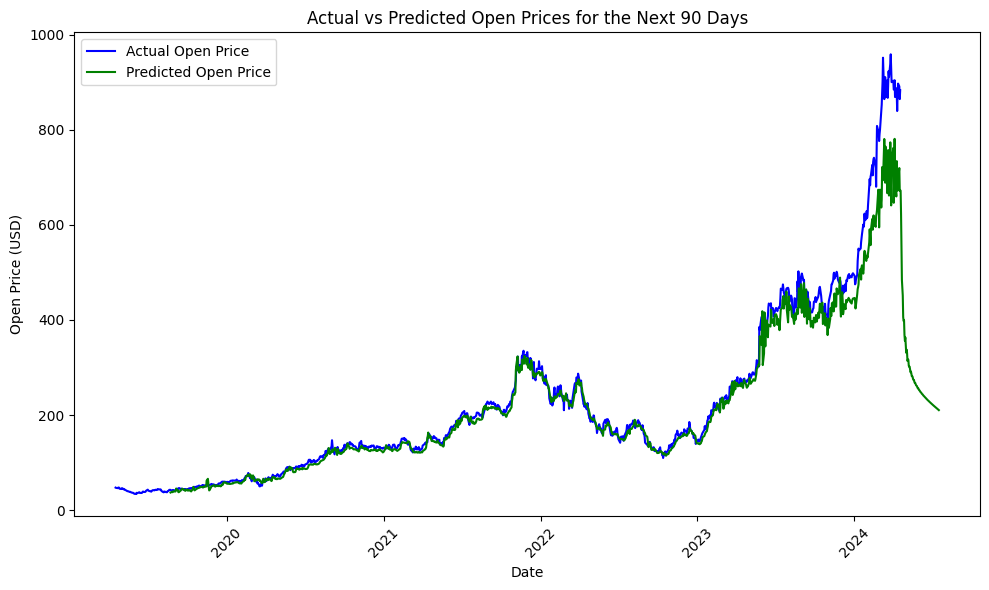

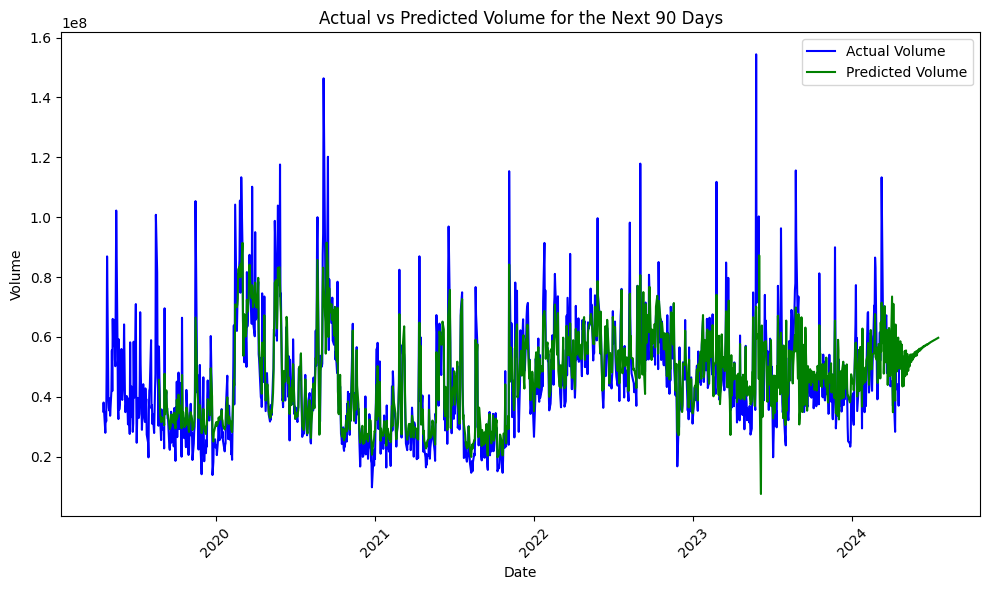

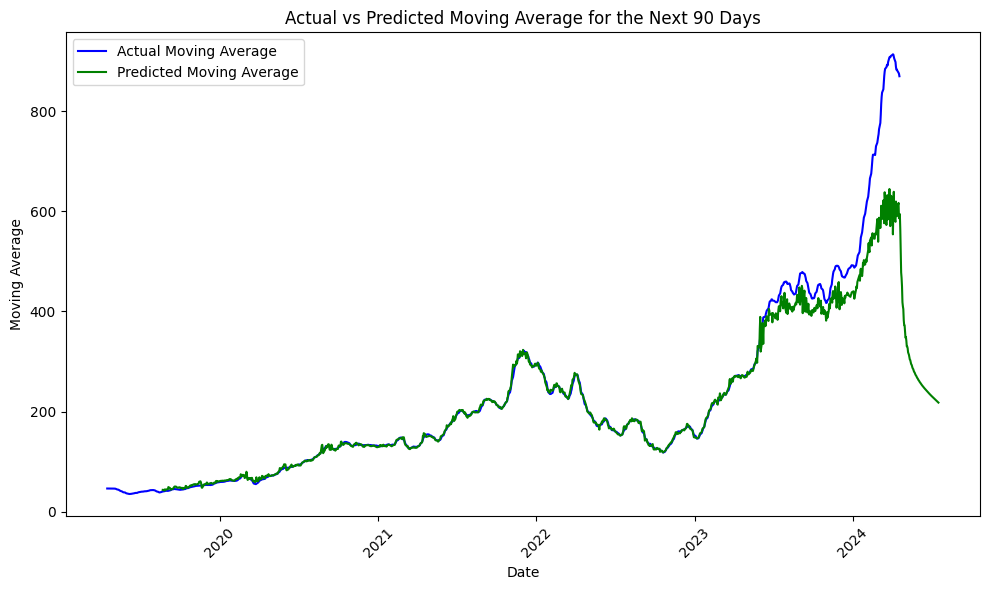

In [185]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch

# Assuming df contains the required data

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Open', 'Volume', 'Moving_Average_10']])
df[['Open_scaled', 'Volume_scaled', 'Moving_Average_10_scaled']] = scaled_data

# Assuming the window size used during training is 90 for three-month predictions
window_size = 90

# Create sequences for prediction
sequences_pred = []
for i in range(len(df) - window_size + 1):
    seq = df[['Open_scaled', 'Volume_scaled', 'Moving_Average_10_scaled']].values[i:i+window_size]
    sequences_pred.append(seq)

# Convert sequences to PyTorch tensor and reshape
X_pred = torch.tensor(sequences_pred, dtype=torch.float32)

# Assuming 'model' is your trained LSTM model
# Set the model to evaluation mode
best_model.eval()

# Make predictions for the next 90 days
with torch.no_grad():
    predicted_values = model(X_pred)

# Inverse scale the predicted values to get actual stock prices in USD
predicted_prices = scaler.inverse_transform(predicted_values.view(-1, 3))

# Create a new DataFrame for easier plotting
predicted_df = pd.DataFrame(predicted_prices, columns=['Predicted Open', 'Predicted Volume', 'Predicted Moving Average'])
predicted_df['Date'] = df['Date'][-len(predicted_prices):].reset_index(drop=True)

# Get the last 90 data points for the next prediction
last_90_data = df[['Open_scaled', 'Volume_scaled', 'Moving_Average_10_scaled']].tail(window_size).values
#print(last_90_data)
next_sequence_tensor = torch.tensor(last_90_data.reshape(1, window_size, 3), dtype=torch.float32)

# Predict the next 90 days
next_predictions = []
next_sequence = next_sequence_tensor.clone()
for _ in range(90):
    with torch.no_grad():
        next_prediction = model(next_sequence)
    next_predictions.append(next_prediction)
    # Update the sequence for the next prediction
    next_sequence = torch.cat((next_sequence[:, 1:, :], next_prediction.unsqueeze(1)), dim=1)
    #print(next_sequence)

# Inverse scale the predicted values and append to the DataFrame
next_prediction_prices = scaler.inverse_transform(torch.cat(next_predictions, dim=1).view(-1, 3))
next_prediction_dates = pd.date_range(df['Date'].max() + pd.DateOffset(days=1), periods=90, freq='D')
next_predicted_df = pd.DataFrame(next_prediction_prices, columns=['Predicted Open', 'Predicted Volume', 'Predicted Moving Average'])
next_predicted_df['Date'] = next_prediction_dates
print("predicted prices",next_predicted_df)

predicted_df = pd.concat([predicted_df, next_predicted_df], ignore_index=True)

# Plotting Open Price
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Open'], label='Actual Open Price', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted Open'], label='Predicted Open Price', color='green')

plt.xlabel('Date')
plt.ylabel('Open Price (USD)')
plt.title('Actual vs Predicted Open Prices for the Next 90 Days')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Volume
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], label='Actual Volume', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted Volume'], label='Predicted Volume', color='green')

plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Actual vs Predicted Volume for the Next 90 Days')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Moving Average
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Moving_Average_10'], label='Actual Moving Average', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted Moving Average'], label='Predicted Moving Average', color='green')

plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.title('Actual vs Predicted Moving Average for the Next 90 Days')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This is a previous model that had better output for a less drastic prediction.

Streaming output truncated to the last 5000 lines.
         [0.9183, 0.2725, 0.9501],
         [0.9072, 0.2842, 0.9431],
         [0.9083, 0.2918, 0.9422],
         [0.9084, 0.2975, 0.9414],
         [0.9081, 0.3013, 0.9406],
         [0.9075, 0.3037, 0.9398],
         [0.9066, 0.3054, 0.9388],
         [0.9055, 0.3064, 0.9377],
         [0.9042, 0.3071, 0.9364],
         [0.9027, 0.3075, 0.9350],
         [0.9011, 0.3078, 0.9334],
         [0.8993, 0.3079, 0.9318],
         [0.8975, 0.3079, 0.9300],
         [0.8956, 0.3078, 0.9281],
         [0.8937, 0.3077, 0.9262],
         [0.8917, 0.3076, 0.9243],
         [0.8898, 0.3075, 0.9223],
         [0.8878, 0.3073, 0.9203],
         [0.8858, 0.3071, 0.9183],
         [0.8838, 0.3069, 0.9163],
         [0.8819, 0.3067, 0.9143],
         [0.8799, 0.3066, 0.9123],
         [0.8780, 0.3064, 0.9103],
         [0.8761, 0.3062, 0.9084],
         [0.8743, 0.3060, 0.9065],
         [0.8725, 0.3058, 0.9046],
         [0.8707, 0.3056, 0.9028],
    

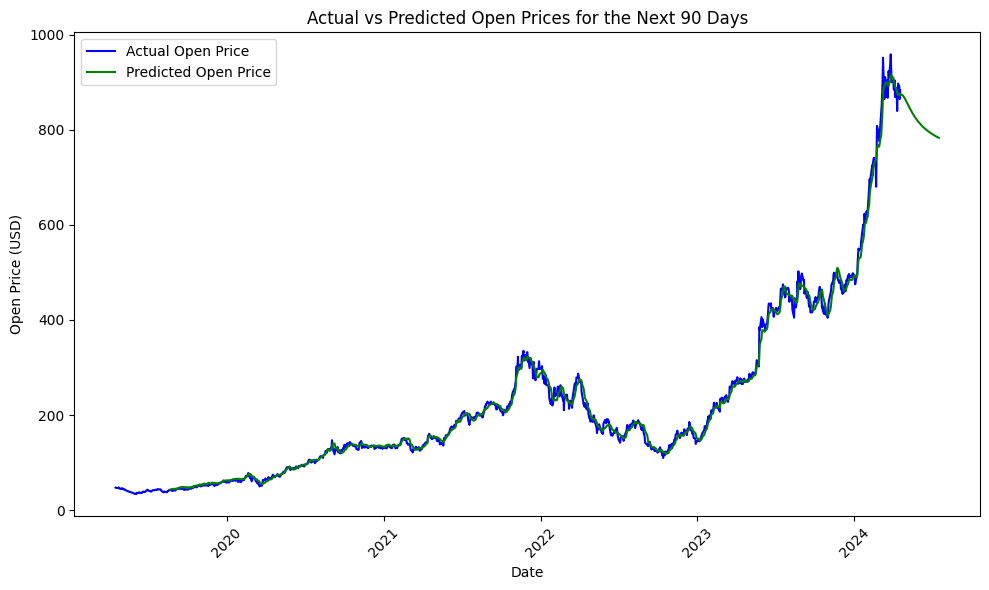

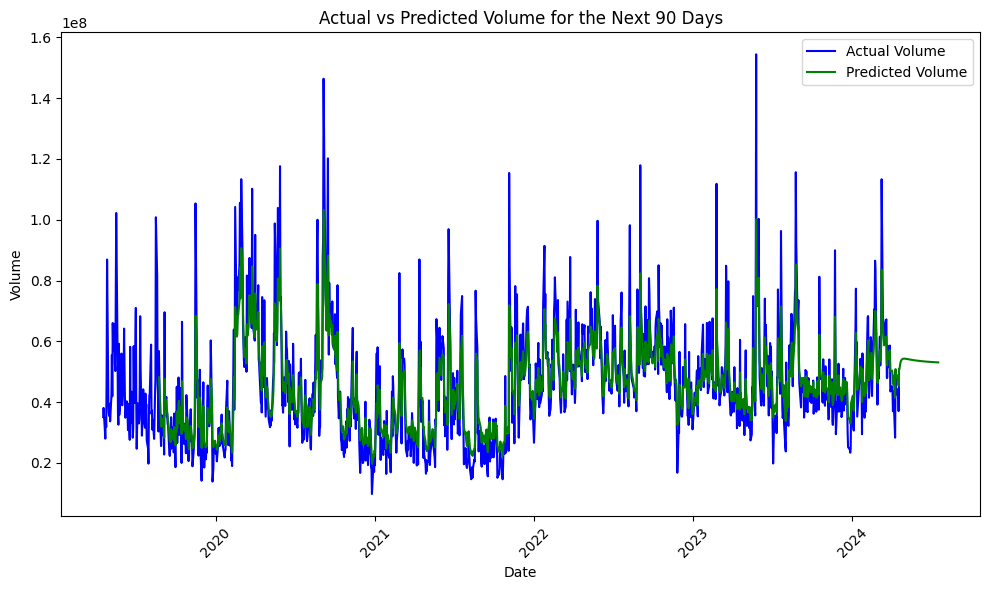

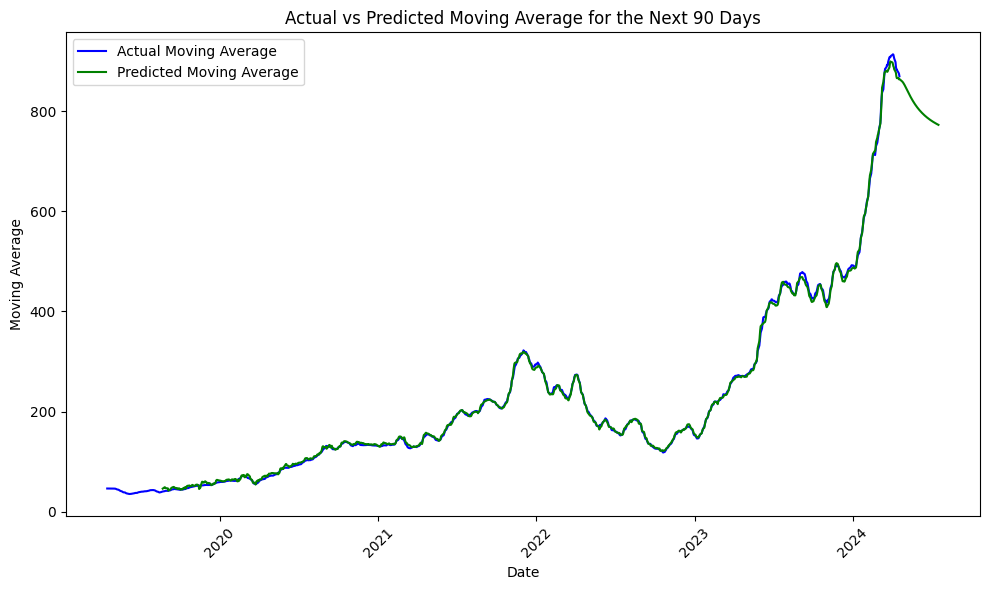

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch

# Assuming df contains the required data

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Open', 'Volume', 'Moving_Average_10']])
df[['Open_scaled', 'Volume_scaled', 'Moving_Average_10_scaled']] = scaled_data

# Assuming the window size used during training is 90 for three-month predictions
window_size = 90

# Create sequences for prediction
sequences_pred = []
for i in range(len(df) - window_size + 1):
    seq = df[['Open_scaled', 'Volume_scaled', 'Moving_Average_10_scaled']].values[i:i+window_size]
    sequences_pred.append(seq)

# Convert sequences to PyTorch tensor and reshape
X_pred = torch.tensor(sequences_pred, dtype=torch.float32)

# Assuming 'model' is your trained LSTM model
# Set the model to evaluation mode
model.eval()

# Make predictions for the next 90 days
with torch.no_grad():
    predicted_values = model(X_pred)

# Inverse scale the predicted values to get actual stock prices in USD
predicted_prices = scaler.inverse_transform(predicted_values.view(-1, 3))

# Create a new DataFrame for easier plotting
predicted_df = pd.DataFrame(predicted_prices, columns=['Predicted Open', 'Predicted Volume', 'Predicted Moving Average'])
predicted_df['Date'] = df['Date'][-len(predicted_prices):].reset_index(drop=True)

# Get the last 90 data points for the next prediction
last_90_data = df[['Open_scaled', 'Volume_scaled', 'Moving_Average_10_scaled']].tail(window_size).values
print(last_90_data)
next_sequence_tensor = torch.tensor(last_90_data.reshape(1, window_size, 3), dtype=torch.float32)

# Predict the next 90 days
next_predictions = []
next_sequence = next_sequence_tensor.clone()
for _ in range(90):
    with torch.no_grad():
        next_prediction = model(next_sequence)
    next_predictions.append(next_prediction)
    # Update the sequence for the next prediction
    next_sequence = torch.cat((next_sequence[:, 1:, :], next_prediction.unsqueeze(1)), dim=1)
    print(next_sequence)

# Inverse scale the predicted values and append to the DataFrame
next_prediction_prices = scaler.inverse_transform(torch.cat(next_predictions, dim=1).view(-1, 3))
next_prediction_dates = pd.date_range(df['Date'].max() + pd.DateOffset(days=1), periods=90, freq='D')
next_predicted_df = pd.DataFrame(next_prediction_prices, columns=['Predicted Open', 'Predicted Volume', 'Predicted Moving Average'])
next_predicted_df['Date'] = next_prediction_dates
print(next_predicted_df)

predicted_df = pd.concat([predicted_df, next_predicted_df], ignore_index=True)

# Plotting Open Price
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Open'], label='Actual Open Price', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted Open'], label='Predicted Open Price', color='green')

plt.xlabel('Date')
plt.ylabel('Open Price (USD)')
plt.title('Actual vs Predicted Open Prices for the Next 90 Days')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Volume
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], label='Actual Volume', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted Volume'], label='Predicted Volume', color='green')

plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Actual vs Predicted Volume for the Next 90 Days')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Moving Average
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Moving_Average_10'], label='Actual Moving Average', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted Moving Average'], label='Predicted Moving Average', color='green')

plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.title('Actual vs Predicted Moving Average for the Next 90 Days')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
